In [92]:
import os
import pandas as pd
import numpy as np
import pickle
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

from functools import reduce

In [2]:
# Correr para crear pickle de data
# Guardar Copia de PAE_2019.xlsx en carpeta Data (El archivo es muy grande para subirse a github)

folder = 'Data'
ruta_pickle = 'DATA_JUNAEB2019.pkl'

path = os.path.join(folder, 'Copia de PAE_2019.xlsx')
data = pd.read_excel(path)

path_pickle = os.path.join(folder, ruta_pickle)
with open(path_pickle, 'wb') as archivo:
    pickle.dump(data, archivo)

In [47]:
folder = 'Data'
ruta_pickle = 'DATA_JUNAEB2019.pkl'

path_pickle = os.path.join(folder, ruta_pickle)

path = os.path.join(path_pickle)
with open(path, 'rb') as file:
    data = pickle.load(file)

path = os.path.join(folder, 'Colegios(Continental)2020.xlsx')
schools = pd.read_excel(path)

In [48]:
data.columns.values

array(['Unnamed: 0', 'InstituciÃ³n', 'RUTEmpresa', 'Tipo',
       'Concesionario', 'Nombre', 'Anno', 'Mes', 'Licitacion',
       'LineadeProducto', 'Region', 'Provincia', 'Nombre_A', 'Comuna',
       'Nombre_B', 'Ute', 'Rbd', 'dv', 'Nombre_C', 'Direccion',
       'Programa', 'Servicio', 'Estrato', 'Nivel', 'TC', 'Cocina',
       'RacEqJunaeb', 'RacEqJecd', 'Precio', 'PrecioPlus', 'DiasASI',
       'TotalRacEqAsigMes', 'Decimo$', 'DiasServidos', 'RacEqRealJunaeb',
       'RacEqRealJecd', 'TotalRacEqRealMes', 'TotalRacEqPagadas',
       'TotalRacIncompletas', 'Tramo', 'Precio$Aju', 'Plus$Aju',
       'RacIncompletas$', 'TotalServidas$', 'TotalNoServidas$',
       'RealTotal$', 'Folio', 'RacionesNoServidasPagodeExcepcion50',
       'Diasal50', 'RacionesNoServidasPagodeExcepcion30', 'Diasal30',
       'Dependencia', 'Sector', 'Acceso', 'IVE', 'Matricula', 'ESTASI',
       'ESTAJU', 'Inactiva', 'CodRacNoServ', 'SIGE', 'RBDMINEDUC',
       'DVMINEDUC', 'DiasCertificados', 'CompensaciÃ³n',
  

In [49]:
data.rename(columns = {'InstituciÃ³n':'Institución', 'Ute':'UT_2019'}, inplace=True)

In [50]:
data['Servicio'] = data['Servicio'].str.strip()
data = data[data['Institución'] == 'JU'] # Seleccionar data JUNAEB

rbds = list(schools.RBD.values)
services = data.Servicio.unique()

In [51]:
data.TotalRacEqAsigMes.dtype

dtype('int64')

In [52]:
data['Precio']

0         1338.833
1         1192.313
2         1572.805
3         1338.833
4         1192.313
            ...   
577394     752.678
577395    1084.403
577396     784.835
577397     766.243
577398     766.243
Name: Precio, Length: 577399, dtype: float64

In [53]:
#data['Precio$Aju'] = data['Precio$Aju'].replace(' ', 0)
#data[data['Precio$Aju']==' ']['Nivel'].unique()

In [54]:
#data['PrecioPorRacion'] = data['RealTotal$Pagado']/data['TotalRacEqPagadas']
#data['PrecioPorRacion'] = data['PrecioPorRacion'].replace(np.NaN, 0)
#data['PrecioPorRacion'] = data['PrecioPorRacion'].replace(np.inf, 0)

In [55]:
#data_fil = data[data['PrecioPorRacion']<50000]

In [56]:
data['UT_2019']

0          3
1          3
2          3
3          3
4          3
          ..
577394    18
577395    18
577396    18
577397    18
577398    18
Name: UT_2019, Length: 577399, dtype: int64

In [57]:
data[data['Rbd']==7629][['UT_2019', 'Rbd']]

,UT_2019,Rbd
2201,3,7629
2202,3,7629
2203,3,7629
3991,3,7629
3992,3,7629
3993,3,7629
29248,6,7629
29249,6,7629
29250,6,7629
82662,6,7629


In [58]:
# Ut_per_rbd = data[['UT_2019','Rbd']].groupby(by=["Rbd"]).std()
# Ut_per_rbd[(Ut_per_rbd != 0).values]

Ut_per_rbd = data[['UT_2019','Rbd', 'RUTEmpresa']].groupby(by=['RUTEmpresa']).std()
Ut_per_rbd[(Ut_per_rbd != 0).values].head()
# condition = Ut_per_rbd % 1 != 0
# Ut_per_rbd[condition]

,UT_2019,Rbd
RUTEmpresa,,
12.448.813-3,0.000000,68603.415564
76.050.335-5,0.662043,212846.174893
76.050.335-5,0.662043,212846.174893
76.072.523-4,0.000000,81944.400444
76.105.050-8,0.778960,158234.032838


In [59]:
print(services)

['O' 'D' 'A' 'C' 'T' 'DCO' 'S/I' 'ACO' 'DCE' 'ACE']


In [60]:
print(rbds)

[2419, 11287, 887864, 8325, 887991, 2532, 2660, 8391, 887874, 887974, 18, 78, 204, 10915, 885060, 886727, 887189, 887928, 887953, 3999, 4195, 887850, 4104, 17897, 993096, 883763, 1233, 40352, 1185, 1433, 1448, 887147, 8458, 2116, 2129, 2139, 2140, 2143, 2223, 2243, 2246, 2264, 2266, 2279, 2294, 2311, 2324, 2328, 2330, 2375, 2379, 2387, 2413, 2414, 2423, 2428, 8564, 9987, 9994, 9998, 10001, 10006, 10077, 10080, 10085, 10090, 10100, 10104, 10113, 10120, 10134, 10409, 15753, 15762, 25047, 25315, 25642, 26157, 40024, 887975, 887996, 5216, 5220, 5224, 5225, 5228, 5248, 5273, 5284, 5289, 5333, 5363, 5382, 5394, 5396, 5434, 5440, 5510, 5538, 5539, 5548, 5550, 5580, 5823, 5824, 5825, 5827, 5828, 5829, 5831, 5832, 5833, 5880, 6066, 6084, 6085, 6086, 6089, 6090, 6092, 6108, 6164, 6227, 6270, 6272, 6285, 6304, 6350, 6352, 6398, 6456, 6471, 6586, 6587, 6589, 6604, 6652, 6708, 6710, 6711, 6712, 6718, 6721, 6726, 6731, 11520, 16941, 19902, 19906, 19913, 19952, 19993, 20121, 20200, 885300, 887842, 88

In [61]:
raciones = {ser: [] for ser in services}
raciones['UT_2019'] = []
raciones['empresa'] = []
precios = {ser: [] for ser in services}
total_pagado = {ser: [] for ser in services}
unitary_prices = {ser: [] for ser in services} # auxiliar para gráficar

for rbd in rbds:
    selected_data = data[data['Rbd'] == rbd]
    hay_servicio = False
    for ser in services:
        if ser in selected_data['Servicio'].unique():
            hay_servicio = True
            raciones_servicio = selected_data[selected_data['Servicio'] == ser]['TotalRacEqAsigMes']
            precios_servicio = selected_data[selected_data['Servicio'] == ser]['Precio']
            pagado_servicio = (precios_servicio*raciones_servicio).sum()

            if raciones_servicio.sum() != 0:
                raciones[ser].append(raciones_servicio.sum())
                precios[ser].append(pagado_servicio/raciones_servicio.sum()) # Promedio ponderado de precio_por_racion
                total_pagado[ser].append(pagado_servicio)
                unitary_prices[ser].append((pagado_servicio/raciones_servicio.sum(), raciones_servicio.sum()))
            else:
                raciones[ser].append(0)
                precios[ser].append(0)
                total_pagado[ser].append(0)
                unitary_prices[ser].append((0,0))
        else:
            raciones[ser].append(0)
            precios[ser].append(0)
            total_pagado[ser].append(0)
            unitary_prices[ser].append((0,0))
    
    if hay_servicio:
        raciones['empresa'].append(selected_data['RUTEmpresa'].values[0])
        raciones['UT_2019'].append(selected_data['UT_2019'].values[0])
    else:
        raciones['empresa'].append(-1)
        raciones['UT_2019'].append(-1)
            
raciones['RBD'] = list(rbds)
precios['RBD'] = list(rbds)
total_pagado['RBD'] = list(rbds)
unitary_prices['RBD'] = list(rbds)

In [62]:
raciones = pd.DataFrame.from_dict(raciones)
raciones

,O,D,A,C,T,DCO,S/I,ACO,DCE,ACE,UT_2019,empresa,RBD
0,0,36979,37174,0,6275,0,0,0,0,0,3,86.400.400-8,2419
1,19988,62809,60170,0,29591,0,0,0,0,0,3,86.400.400-8,11287
2,56000,28000,31500,28000,0,0,0,0,0,0,2,86.400.400-8,887864
3,0,60160,67310,0,23919,0,0,0,0,0,4,96.565.270-1,8325
4,0,0,0,0,0,0,0,0,0,0,-1,-1,887991
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8929,0,0,0,0,0,500,0,0,0,0,13,76.840.043-1,913163
8930,0,0,0,0,0,0,0,12,0,0,13,76.840.043-1,913225
8931,0,0,0,0,0,14770,0,0,0,0,12,76.840.043-1,940401
8932,0,0,0,0,0,1459,0,0,0,0,17,76.840.043-1,941450


In [63]:
precio_por_racion = pd.DataFrame.from_dict(precios)
precio_por_racion

,O,D,A,C,T,DCO,S/I,ACO,DCE,ACE,RBD
0,0.00000,843.560424,1080.402511,0.000,238.778417,0.000000,0.0,0.000,0.0,0.0,2419
1,953.87898,905.502365,1163.156655,0.000,248.049187,0.000000,0.0,0.000,0.0,0.0,11287
2,1554.56200,1369.877000,1801.576000,1870.229,0.000000,0.000000,0.0,0.000,0.0,0.0,887864
3,0.00000,460.977663,1136.050461,0.000,907.467796,0.000000,0.0,0.000,0.0,0.0,8325
4,0.00000,0.000000,0.000000,0.000,0.000000,0.000000,0.0,0.000,0.0,0.0,887991
...,...,...,...,...,...,...,...,...,...,...,...
8929,0.00000,0.000000,0.000000,0.000,0.000000,888.285000,0.0,0.000,0.0,0.0,913163
8930,0.00000,0.000000,0.000000,0.000,0.000000,0.000000,0.0,1443.474,0.0,0.0,913225
8931,0.00000,0.000000,0.000000,0.000,0.000000,876.756924,0.0,0.000,0.0,0.0,940401
8932,0.00000,0.000000,0.000000,0.000,0.000000,863.958882,0.0,0.000,0.0,0.0,941450


In [64]:
precio_por_racion.describe()

,O,D,A,C,T,DCO,S/I,ACO,DCE,ACE,RBD
count,8934.000000,8934.000000,8934.000000,8934.000000,8934.000000,8934.000000,8934.000000,8934.000000,8934.000000,8934.000000,8934.000000
mean,282.933165,624.024838,1001.662139,82.260571,635.416336,25.493190,0.349084,25.949072,46.057054,72.618110,78562.969443
std,505.897279,259.508137,408.990661,439.865097,611.167637,157.210048,23.329936,197.606185,225.364892,351.710777,237964.143672
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,521.810090,973.364204,0.000000,355.973779,0.000000,0.000000,0.000000,0.000000,0.000000,3744.250000
50%,0.000000,620.800606,1077.731282,0.000000,555.790026,0.000000,0.000000,0.000000,0.000000,0.000000,7923.000000
75%,580.048800,785.682088,1179.596195,0.000000,857.614239,0.000000,0.000000,0.000000,0.000000,0.000000,16712.500000
max,5532.564000,4068.468000,4204.392828,5532.564000,3340.396662,1750.935727,1559.358000,2185.675000,2002.230932,2520.056828,993187.000000


In [65]:
# Rbds sin raciones

raciones[raciones.loc[:,['O', 'D', 'A', 'C', 'T', 'DCO', 'S/I', 'ACO', 'DCE', 'ACE']].sum(axis=1)==0]

,O,D,A,C,T,DCO,S/I,ACO,DCE,ACE,UT_2019,empresa,RBD
4,0,0,0,0,0,0,0,0,0,0,-1,-1,887991
8,0,0,0,0,0,0,0,0,0,0,-1,-1,887874
9,0,0,0,0,0,0,0,0,0,0,-1,-1,887974
17,0,0,0,0,0,0,0,0,0,0,-1,-1,887928
18,0,0,0,0,0,0,0,0,0,0,-1,-1,887953
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8895,0,0,0,0,0,0,0,0,0,0,-1,-1,888097
8896,0,0,0,0,0,0,0,0,0,0,-1,-1,888099
8897,0,0,0,0,0,0,0,0,0,0,-1,-1,888113
8898,0,0,0,0,0,0,0,0,0,0,-1,-1,888101


In [66]:
total_pagado = pd.DataFrame.from_dict(total_pagado) # Data con lo pagado por servicio
total_pagado

,O,D,A,C,T,DCO,S/I,ACO,DCE,ACE,RBD
0,0.000000e+00,3.119402e+07,4.016288e+07,0.0,1.498335e+06,0.000000e+00,0.0,0.000,0.0,0.0,2419
1,1.906613e+07,5.687370e+07,6.998714e+07,0.0,7.340024e+06,0.000000e+00,0.0,0.000,0.0,0.0,11287
2,8.705547e+07,3.835656e+07,5.674964e+07,52366412.0,0.000000e+00,0.000000e+00,0.0,0.000,0.0,0.0,887864
3,0.000000e+00,2.773242e+07,7.646756e+07,0.0,2.170572e+07,0.000000e+00,0.0,0.000,0.0,0.0,8325
4,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000,0.0,0.0,887991
...,...,...,...,...,...,...,...,...,...,...,...
8929,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,4.441425e+05,0.0,0.000,0.0,0.0,913163
8930,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,17321.688,0.0,0.0,913225
8931,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,1.294970e+07,0.0,0.000,0.0,0.0,940401
8932,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,1.260516e+06,0.0,0.000,0.0,0.0,941450


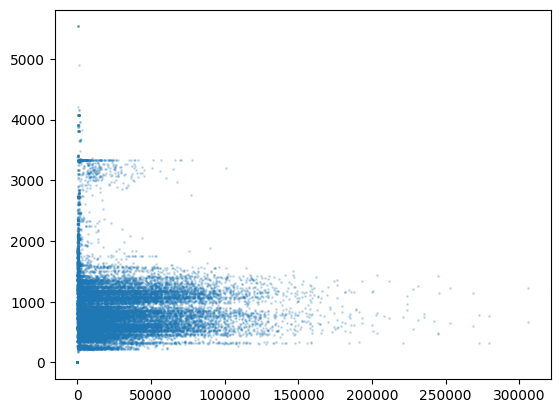

In [67]:
new_list = [values for key, values in  unitary_prices.items() if key in services]

massive = reduce(lambda x, y: x + y, new_list)

y = [value[0] for value in massive]
x = [value[1] for value in massive]

plt.scatter(x, y, alpha=0.2,  s=1)

In [112]:
# Calculo de promedio de raciones

total_paga = total_pagado.drop(columns=['RBD'])
total_paga = total_paga.sum().sum()
cant_raciones_totales = raciones.drop(columns=['RBD'])
cant_raciones_totales = cant_raciones_totales.sum().sum()

print(f"Cantidad total de raciones 2019: {cant_raciones_totales}")
print(f"Cantidad total pagada 2019: {total_paga}")
print(f"Promedio de precio por ración 2019: {total_paga/cant_raciones_totales}")

TypeError: can only concatenate str (not "int") to str

In [69]:
# Cantidad raciones 2020 vs Cantidad raciones 2019
parent_folder = 'Data'
folder = 'Raciones'
folder2 = 'Precios'
path = os.path.join(parent_folder, folder, 'Raciones_totales.xlsx')
path2 = os.path.join(parent_folder, folder2, 'Precios_CAN.xlsx')
path3 = os.path.join(parent_folder, folder2, 'Precios_noCan.xlsx')

data2020raciones = pd.read_excel(path)
data2020precios1 = pd.read_excel(path2)
data2020precios2 = pd.read_excel(path3)

data2020precios1 = data2020precios1.drop(columns=['RBD'])
data2020precios2 = data2020precios2.drop(columns=['RBD'])
total_paga2 = data2020precios1.sum().sum() + data2020precios2.sum().sum()

data2020raciones = data2020raciones.drop(columns=['RBD'])
total = data2020raciones.sum().sum()

print(f"Cantidad total de raciones 2020: {total}")
print(f"Cantidad total pagada 2020: {total_paga2}")
print(f"Promedio de precio por ración 2020: {total_paga2/total}")

Cantidad total de raciones 2020: 675108587
Cantidad total pagada 2020: 1147756806382.25
Promedio de precio por ración 2020: 1700.1069583229134


In [70]:
# Cantidad total raciones 2019 < 2020

660764579 < 675108587

True

In [71]:
parent_folder = 'Data'
folder = 'Raciones'
path = os.path.join(parent_folder, folder, 'Raciones_totales_2019.xlsx')

raciones.to_excel(path, index=False)

In [72]:
raciones.head()

,O,D,A,C,T,DCO,S/I,ACO,DCE,ACE,UT_2019,empresa,RBD
0,0,36979,37174,0,6275,0,0,0,0,0,3,86.400.400-8,2419
1,19988,62809,60170,0,29591,0,0,0,0,0,3,86.400.400-8,11287
2,56000,28000,31500,28000,0,0,0,0,0,0,2,86.400.400-8,887864
3,0,60160,67310,0,23919,0,0,0,0,0,4,96.565.270-1,8325
4,0,0,0,0,0,0,0,0,0,0,-1,-1,887991


# Sum raciones y $

In [73]:
print(np.all(raciones.drop('empresa', axis=1).max()*10 < 2**64))
print(np.all(total_pagado.max()*10 < 2**64))

True
True


In [74]:
raciones['raciones_sum'] = raciones.drop(['RBD', 'UT_2019', 'empresa'], axis=1).sum(axis=1)
total_pagado['pagado_sum'] = total_pagado.drop('RBD', axis=1).sum(axis=1)

In [75]:
sum_df = pd.merge(raciones[['raciones_sum', 'RBD', 'UT_2019', 'empresa']], total_pagado[['pagado_sum', 'RBD']], on='RBD')


# Data Ruteo

In [76]:
folder = 'Solution1'
file_path = 'colegios_final.csv'

path = os.path.join(folder, file_path)
ruteo = pd.read_csv(path)

In [77]:
ruteo['value']

0        84209
1        82549
2        80863
3       101653
4        73857
         ...  
8929     74449
8930     74574
8931     74322
8932     74787
8933     78015
Name: value, Length: 8934, dtype: int64

In [78]:
ruteo.columns

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'indice', 'RBD', 'UTE',
       'Region', 'Nombre', 'Direccion', 'Comuna', 'Provincia', 'closest',
       'value', 'geometry', 'x', 'y', 'prob', 'Aristas'],
      dtype='object')

In [79]:
raciones_con_ruteo = sum_df.join(ruteo[['RBD', 'value', 'UTE', 'Region', 'x', 'y']].set_index('RBD'), on='RBD', how='left')


In [80]:
raciones_con_ruteo.head()

,raciones_sum,RBD,UT_2019,empresa,pagado_sum,value,UTE,Region,x,y
0,80428,2419,3,86.400.400-8,7.285524e+07,84209,3,6,32062129572,621262608817
1,172558,11287,3,86.400.400-8,1.532670e+08,82549,3,6,30835597943,620399707399
2,143500,887864,2,86.400.400-8,2.345281e+08,80863,2,6,34955724103,624115140951
3,151389,8325,4,96.565.270-1,1.259057e+08,101653,4,10,21244355161,534801176765
4,0,887991,-1,-1,0.000000e+00,73857,4,7,26522400054,602996674240


In [81]:
data_sum_x_ut = raciones_con_ruteo[raciones_con_ruteo['UT_2019'] != -1]

In [82]:
data_sum_x_ut = data_sum_x_ut[['raciones_sum', 'pagado_sum', 'value', 'empresa']].groupby(by=['empresa']).sum()


In [83]:
print(np.all(data_sum_x_ut.max() < 2**64))
print(np.all(data_sum_x_ut.max() < 2**64))

True
True


In [84]:
len(data_sum_x_ut)

29

In [85]:
import math
corrs = []
r2s = []
from sklearn.linear_model import LinearRegression

for i in range(1, 200):
    alpha = i*10
    data_sum_x_ut['pagado_ajustado_log'] = ((data_sum_x_ut['pagado_sum'] - alpha*data_sum_x_ut['value'])/data_sum_x_ut['raciones_sum']) #.apply(lambda x: np.log(x))

    model = LinearRegression()
    tot = data_sum_x_ut['raciones_sum'].values.reshape(-1, 1)
    PR = data_sum_x_ut['pagado_ajustado_log'].values.reshape(-1, 1)
    model.fit(X=tot, y=PR)
    r_2 = model.score(tot, PR)
    r2s.append(r_2)

    corr_coef = np.corrcoef(data_sum_x_ut['raciones_sum'], data_sum_x_ut['pagado_ajustado_log'])[1,0]
    corrs.append(corr_coef)


In [86]:
print(np.argmax(r2s))

73


In [87]:
alpha = 1*10
data_sum_x_ut['pagado_ajustado'] = (data_sum_x_ut['pagado_sum'] - alpha*data_sum_x_ut['value'] )/data_sum_x_ut['raciones_sum']

In [43]:
len(data_sum_x_ut)

29

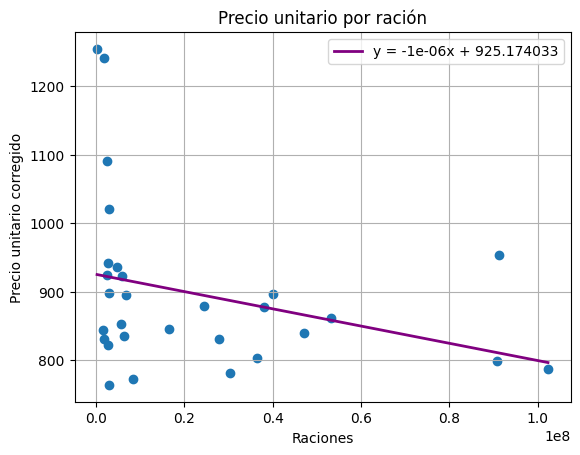

In [88]:
# logx = False
# logy = False



model = LinearRegression()
tot = data_sum_x_ut['raciones_sum'].values.reshape(-1, 1)
PR = data_sum_x_ut['pagado_ajustado'].values.reshape(-1, 1)
model.fit(X=tot, y=PR)

m = model.coef_[0][0]
b = model.intercept_[0]

plt.scatter(data_sum_x_ut['raciones_sum'], data_sum_x_ut['pagado_ajustado'])

x = np.linspace(min(data_sum_x_ut['raciones_sum']) + 0.001, max(data_sum_x_ut['raciones_sum']), 100)
y = m * x + b
plt.plot(x, y, label=f'y = {round(m,6)}x + {round(b,6)}', color='Purple', linewidth=2.0)

# Set labels for the axes
plt.xlabel('Raciones')
plt.ylabel('Precio unitario corregido')

text = ''
# if logx:
#     plt.xscale('log')
#     text += 'log/'
# else:
#     text += 'norm/'
# if logy:
#     text += 'log'
# else:
#     text += 'norm'


# Set a title for the plot
plt.grid(True)
plt.legend()
plt.title(f'Precio unitario por ración');

In [89]:
print(m)
print(b)

-1.2579238148388987e-06
925.1740331230139


In [96]:
import statsmodels.formula.api as smf

df = pd.DataFrame({'raciones_sum': data_sum_x_ut['raciones_sum'], 'pagado_ajustado': data_sum_x_ut['pagado_ajustado']})
model = smf.ols('pagado_ajustado ~ raciones_sum', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        pagado_ajustado   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     2.751
Date:                Mon, 11 Dec 2023   Prob (F-statistic):              0.109
Time:                        13:07:09   Log-Likelihood:                -178.51
No. Observations:                  29   AIC:                             361.0
Df Residuals:                      27   BIC:                             363.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      925.1740     27.936     33.118   

In [152]:
num_alumnos = data_sum_x_ut['raciones_sum']/120 # 12 meses * 10 categorías de comida
num_manipuladoras = num_alumnos//70
data_sum_x_ut['n_manipuladoras'] = num_manipuladoras
data_sum_x_ut['pagado_ajustado2'] = (data_sum_x_ut['pagado_sum'] - data_sum_x_ut['value'] 
                                     - data_sum_x_ut['n_manipuladoras']*700000)/data_sum_x_ut['raciones_sum']

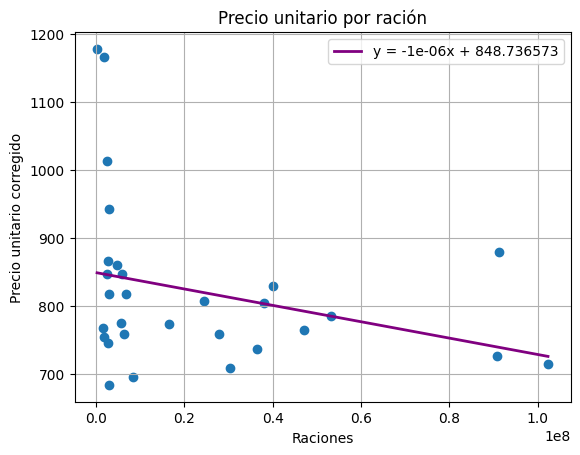

In [153]:
model = LinearRegression()
tot = data_sum_x_ut['raciones_sum'].values.reshape(-1, 1)
PR = data_sum_x_ut['pagado_ajustado2'].values.reshape(-1, 1)
model.fit(X=tot, y=PR)

m = model.coef_[0][0]
b = model.intercept_[0]

plt.scatter(data_sum_x_ut['raciones_sum'], data_sum_x_ut['pagado_ajustado2'])

x = np.linspace(min(data_sum_x_ut['raciones_sum']) + 0.001, max(data_sum_x_ut['raciones_sum']), 100)
y = m * x + b
plt.plot(x, y, label=f'y = {round(m,6)}x + {round(b,6)}', color='Purple', linewidth=2.0)
plt.xlabel('Raciones')
plt.ylabel('Precio unitario corregido')
plt.grid(True)
plt.legend()
plt.title(f'Precio unitario por ración');

In [147]:
print(m)
print(b)

-1.2063580728632076e-06
848.7365729225629


In [154]:
df = pd.DataFrame({'raciones_sum': data_sum_x_ut['raciones_sum'], 'pagado_ajustado': data_sum_x_ut['pagado_ajustado']})
modelo = smf.ols('pagado_ajustado ~ raciones_sum', data=df).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:        pagado_ajustado   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     2.751
Date:                Mon, 11 Dec 2023   Prob (F-statistic):              0.109
Time:                        16:15:15   Log-Likelihood:                -178.51
No. Observations:                  29   AIC:                             361.0
Df Residuals:                      27   BIC:                             363.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      925.1740     27.936     33.118   

Analicemos los residuos

In [239]:
y = np.array(data_sum_x_ut['pagado_ajustado2']).reshape(-1,1)
x = np.array(data_sum_x_ut['raciones_sum']).reshape(-1,1)

pred = model.predict(x)
residuals = y - pred

Text(0.5, 1.0, 'Residuos vs cantidad de raciones de modelo OLS')

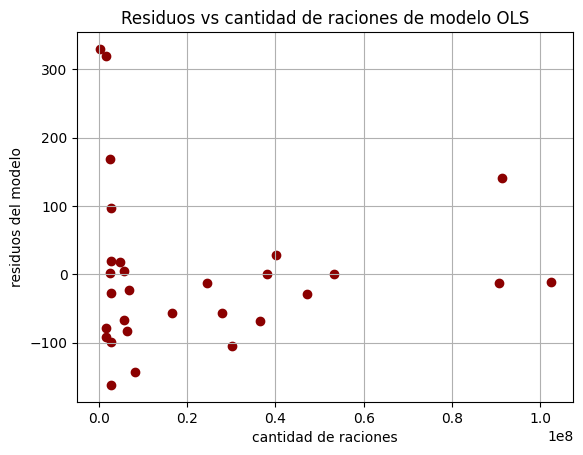

In [246]:
plt.scatter(x, residuals, color='darkred')
plt.grid()
plt.xlabel('cantidad de raciones')
plt.ylabel('residuos del modelo')
plt.title('Residuos vs cantidad de raciones de modelo OLS')

Evidentemente la varianza no es constante, pues el grafico de precio por racion vs residuos muestra una relacion lineal

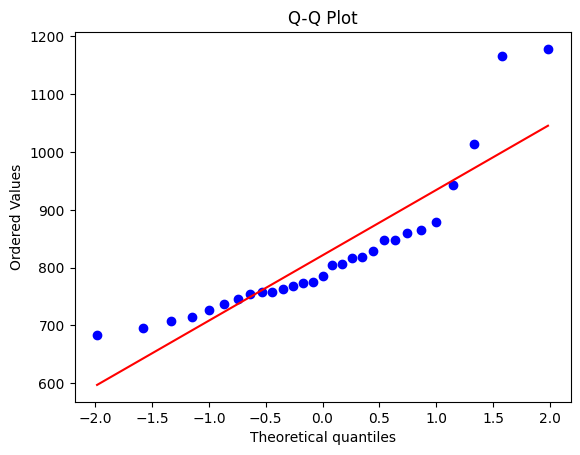

In [244]:
# Veamos si los datos provienen de una distribucicion normal

from scipy.stats import probplot
probplot(data_sum_x_ut['pagado_ajustado2'], dist='norm', plot=plt)
plt.title('Q-Q Plot')
plt.show()

Observamos que la varianza se comporta de manera lineal, por lo que se establece ue la varianza del modelo decrece linealmente con las raciones  
var = raciones * $\sigma^2$. Es lógico implementar un modelo de minimos cuadrados ponderados

In [184]:
import statsmodels.api as sm
X = data_sum_x_ut[['raciones_sum']]
y = data_sum_x_ut['pagado_ajustado2']

# Fit a model to estimate the residuals
model_ols = sm.OLS(y, sm.add_constant(X)).fit()
residuals = model_ols.resid

# Model the relationship between variance and predictor variable
# You can choose a different functional form based on your observations
variance_model = sm.OLS(np.abs(residuals), sm.add_constant(X)).fit()
predicted_variance = variance_model.predict(sm.add_constant(X))

# Create weights based on the inverse of the predicted variance
weights = 1.0 / np.sqrt(predicted_variance)

# Fit a WLS model
wls_model = sm.WLS(y, sm.add_constant(X), weights=weights)

# Fit the model
wls_results = wls_model.fit()

# Print the summary
print(wls_results.summary())

                            WLS Regression Results                            
Dep. Variable:       pagado_ajustado2   R-squared:                       0.107
Model:                            WLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     3.232
Date:                Mon, 11 Dec 2023   Prob (F-statistic):             0.0834
Time:                        16:59:14   Log-Likelihood:                -177.32
No. Observations:                  29   AIC:                             358.6
Df Residuals:                      27   BIC:                             361.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          845.3665     27.858     30.346   

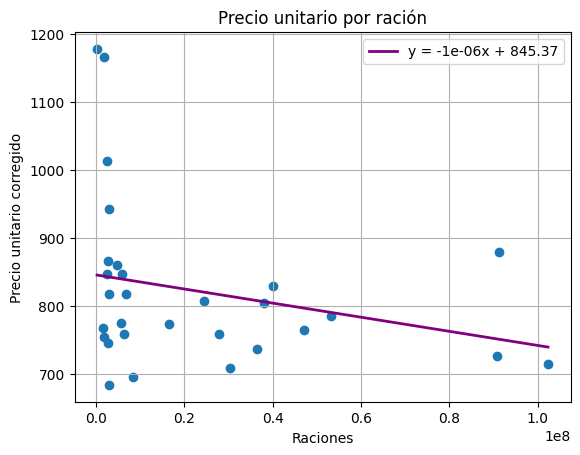

In [193]:
model = LinearRegression()
tot = data_sum_x_ut['raciones_sum'].values.reshape(-1, 1)
PR = data_sum_x_ut['pagado_ajustado2'].values.reshape(-1, 1)
model.fit(X=tot, y=PR)

coefficients = wls_results.params
b = coefficients.const
m = coefficients.raciones_sum

plt.scatter(data_sum_x_ut['raciones_sum'], data_sum_x_ut['pagado_ajustado2'])

x = np.linspace(min(data_sum_x_ut['raciones_sum']) + 0.001, max(data_sum_x_ut['raciones_sum']), 100)
y = m * x + b
plt.plot(x, y, label=f'y = {round(m,6)}x + {round(b,2)}', color='Purple', linewidth=2.0)
plt.xlabel('Raciones')
plt.ylabel('Precio unitario corregido')
plt.grid(True)
plt.legend()
plt.title(f'Precio unitario por ración');